In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as st

In [2]:
max_20_b=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/s_cen_b.csv')
max_20_m=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/s_cen_m.csv')
max_20_e=pd.read_csv('~D:/Vasiliev/PERMAK-A/nv/8d9d/s_cen_e.csv')
bad_state=20
s = "центральных";

In [3]:
def PlotDataFrame(_name,legend_prefix,df1):
    plt.figure(figsize=(12,10));
    bind=np.arange(min(df1[_name]),max(df1[_name]),step=0.25);
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1[_name],percent)
    plt.hist(df1[_name],bind,label='{}, dkr(95%)={:.2f}'.format(legend_prefix,quant),alpha=0.75, color='blue');    
    plt.vlines(quant,0,250,color='red')
    plt.legend(fontsize=20);
    plt.title(('Отклоенение в энерговыделении {} твэлов').format(s),fontsize=20);
    plt.show();

In [4]:
## Algorithm works well
def CalculateDeviations(_nominal, _deviated):
    dkr=[]
    for _state in pd.unique(_deviated.state):
        df=_deviated.query('state==@_state');
        df.index=np.arange(0,len(df),step=1);
        for i in range(len(df)):
            if (_nominal.tvs[i]==df.loc[i,'tvs']):
                #kr1=_nominal.kr[i]; ## That is KR
                #kr2=df.loc[i,'kr']; ## That is KR
                kr1=_nominal.kk[i];  ## That is KK
                kr2=df.loc[i,'kk'];  ## That is KK
                dev=100*(kr2-kr1)/kr1;
                dkr.append(dev);
    return dkr;

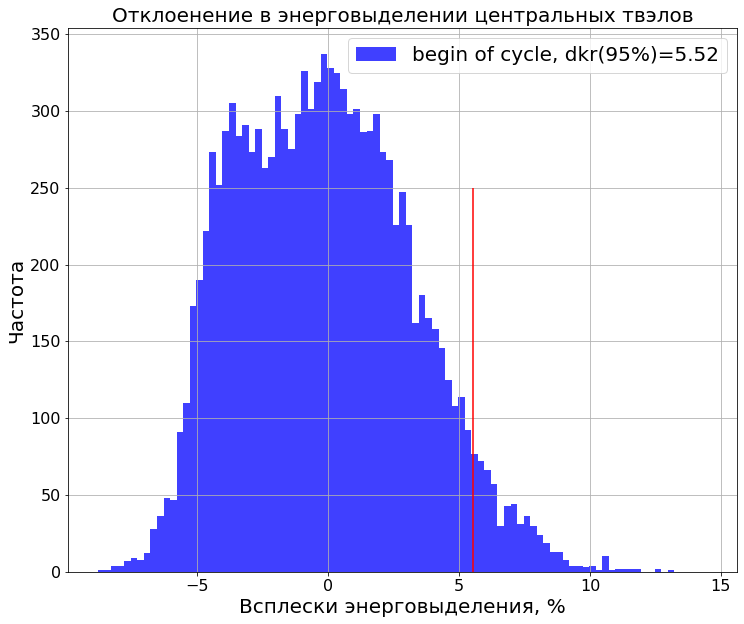

In [5]:
nom_b=max_20_b.query('state==0')
max_20_b=max_20_b.query('state!=0 & state != @bad_state')
max_20_b['dkr']=CalculateDeviations(nom_b,max_20_b);
PlotDataFrame('dkr','begin of cycle', max_20_b);

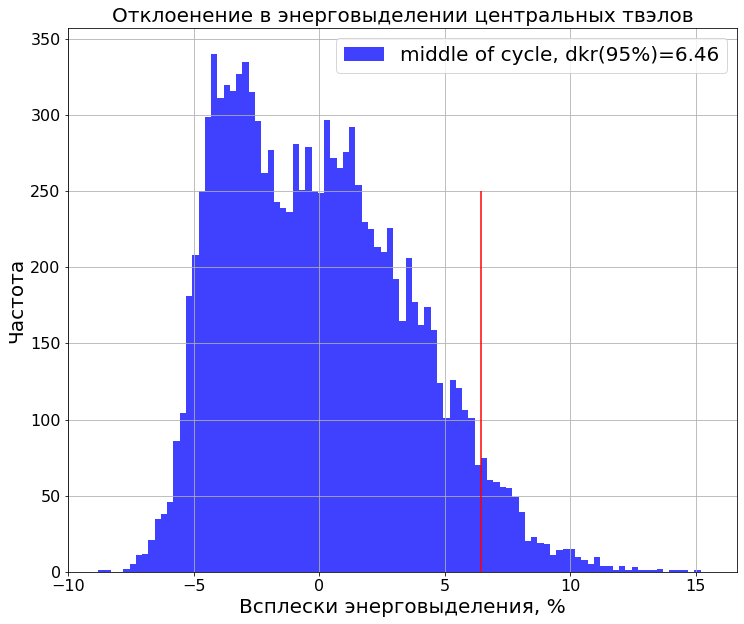

In [6]:
nom_m=max_20_m.query('state==0')
max_20_m=max_20_m.query('state!=0 & state!=@bad_state')
max_20_m['dkr']=CalculateDeviations(nom_m,max_20_m);
PlotDataFrame('dkr','middle of cycle', max_20_m)

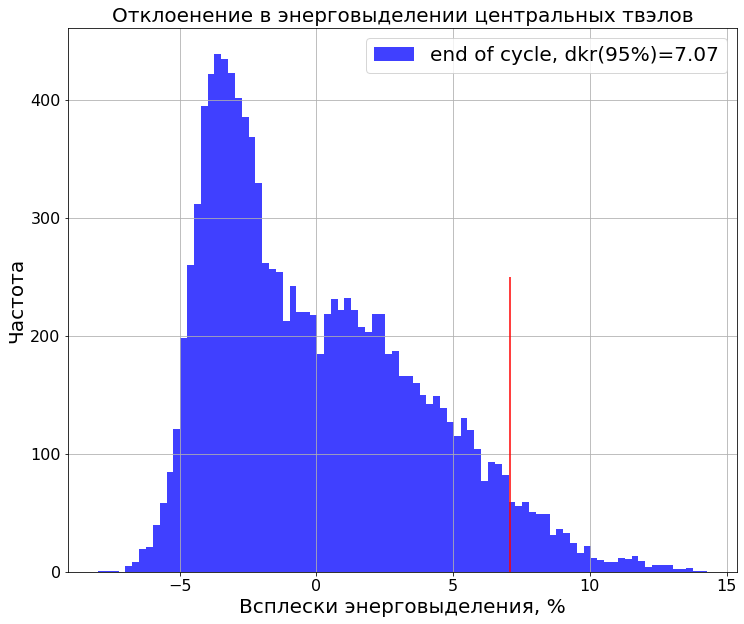

In [7]:
nom_e=max_20_e.query('state==0')
max_20_e=max_20_e.query('state!=0 & state!=@bad_state')
max_20_e['dkr']=CalculateDeviations(nom_e,max_20_e);
PlotDataFrame('dkr','end of cycle', max_20_e)